动量计算公式
做差法求值

导入相关组件

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
Vanke = pd.read_csv('Vanke.csv')
Vanke.index = Vanke.iloc[:, 1]
Vanke.index = pd.to_datetime(Vanke.index, format='%Y-%m-%d')
Vanke = Vanke.iloc[:, 2:]
Vanke.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01,8.03,8.03,8.03,8.03,0
2014-01-02,7.99,8.07,7.92,7.99,48529900


比如以万科为例，计算5期的动量值 先提取收盘价，然后定义5期后的收盘价，进行做差

In [18]:
Close = Vanke.Close
Close.describe()

count    344.000000
mean       9.846337
std        2.268338
min        6.570000
25%        7.987500
50%        9.250000
75%       11.967500
max       14.910000
Name: Close, dtype: float64

In [19]:
Close.head(10)

Date
2014-01-01    8.03
2014-01-02    7.99
2014-01-03    7.84
2014-01-06    7.48
2014-01-07    7.43
2014-01-08    7.42
2014-01-09    7.46
2014-01-10    7.38
2014-01-13    7.24
2014-01-14    7.23
Name: Close, dtype: float64

In [20]:
lag5Close = Close.shift(5)

In [21]:
lag5Close.head(10)

Date
2014-01-01     NaN
2014-01-02     NaN
2014-01-03     NaN
2014-01-06     NaN
2014-01-07     NaN
2014-01-08    8.03
2014-01-09    7.99
2014-01-10    7.84
2014-01-13    7.48
2014-01-14    7.43
Name: Close, dtype: float64

In [22]:
momentum5 = Close - lag5Close
momentum5.tail()

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

绘制收盘价和五日动量曲线

Text(0, 0.5, 'Momentum5')

D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


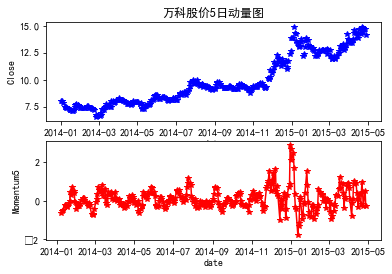

In [23]:
#plot
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(211)
plt.plot(Close, 'b*')
plt.xlabel('date')
plt.ylabel('Close')
plt.title('万科股价5日动量图')

plt.subplot(212)
plt.plot(momentum5, 'r-*')
plt.xlabel('date')
plt.ylabel('Momentum5')

上述算法的缺点，由于是两个值的互减，所以如果本身股价很高，则差值也大，在多个股票间比对可能特征不容易发现，所以也有版本改为用除法的方式

通过除法求动量值

In [24]:
#divide
Momen5 = Close / lag5Close - 1
Momen5 = Momen5.dropna()
Momen5[0:5]

Date
2014-01-08   -0.075965
2014-01-09   -0.066333
2014-01-10   -0.058673
2014-01-13   -0.032086
2014-01-14   -0.026918
Name: Close, dtype: float64

为了程序简化 制作一个特殊函数 封装刚才的算法 

In [25]:
# 动能计算函数
def momentum(price, period):
    lagPrice = price.shift(period)
    moment = price - lagPrice
    moment = moment.dropna()
    return moment

In [27]:
momentum(Close, 5).tail(n=5)

Date
2015-04-22    0.98
2015-04-23    0.46
2015-04-24   -0.25
2015-04-27    0.49
2015-04-28   -0.29
Name: Close, dtype: float64

In [28]:
momen35 = momentum(Close, 35)
momen35.tail(40)

Date
2015-03-04   -0.88
2015-03-05   -1.87
2015-03-06   -1.58
2015-03-09    0.05
2015-03-10   -0.33
2015-03-11   -1.12
2015-03-12   -1.36
2015-03-13   -1.69
2015-03-16   -1.21
2015-03-17   -0.55
2015-03-18    0.14
2015-03-19   -0.14
2015-03-20    0.02
2015-03-23    0.48
2015-03-24    0.09
2015-03-25   -0.02
2015-03-26    0.25
2015-03-27    1.19
2015-03-30    2.06
2015-03-31    1.40
2015-04-01    1.31
2015-04-02    1.12
2015-04-03    0.69
2015-04-06    0.81
2015-04-07    0.95
2015-04-08    1.05
2015-04-09    1.87
2015-04-10    1.55
2015-04-13    1.60
2015-04-14    1.35
2015-04-15    1.50
2015-04-16    1.45
2015-04-17    1.92
2015-04-20    1.44
2015-04-21    2.28
2015-04-22    2.66
2015-04-23    2.86
2015-04-24    2.48
2015-04-27    2.48
2015-04-28    2.17
Name: Close, dtype: float64

为了直观的观察动能和K线的关联，我们通过Python程序对万科股票的K线和35日动能进行对比


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator, \
                                DayLocator, MONDAY, date2num
from mpl_finance import candlestick_ohlc

D:\Programing\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [12]:
# 定义 candleLinePlots 函数
def candleLinePlots(candleData, candleTitle='a', **kwargs):
    Date = [date2num(date) for date in candleData.index]
    candleData.loc[:, 'Date'] = Date
    listData = []

    for i in range(len(candleData)):
        a = [candleData.Date[i],\
            candleData.Open[i],candleData.High[i],\
            candleData.Low[i],candleData.Close[i]]
        listData.append(a)
    # 如 果 不 定 长 参 数 无 取 值 ， 只 画 蜡 烛 图
    ax = plt.subplot()

    # 如 果 不 定 长 参 数 有 值 ， 则 分 成 两 个 子 图
    flag = 0
    if kwargs:
        if kwargs['splitFigures']:
            ax = plt.subplot(211)
            ax2 = plt.subplot(212)
            flag = 1
        # 如 果 无 参 数 splitFigures ， 则 只 画 一 个 图 形 框
        # 如 果 有 参 数 splitFigures ， 则 画 出 两 个 图 形 框

        for key in kwargs:
            if key == 'title':
                ax2.set_title(kwargs[key])
            if key == 'ylabel':
                ax2.set_ylabel(kwargs[key])
            if key == 'grid':
                ax2.grid(kwargs[key])
            if key == 'Data':
                plt.sca(ax)
                if flag:
                    plt.sca(ax2)

                #一维数据
                if kwargs[key].ndim == 1:
                    plt.plot(kwargs[key],\
                             color='k',\
                             label=kwargs[key].name)
                    plt.legend(loc='best')
                #二维数据有两个columns
                elif all([kwargs[key].ndim==2,\
                          len(kwargs[key].columns)==2]):
                    plt.plot(kwargs[key].iloc[:, 0],
                             color='k',
                             label=kwargs[key].iloc[:, 0].name)
                    plt.plot(kwargs[key].iloc[:,1],\
                             linestyle='dashed',\
                             label=kwargs[key].iloc[:,1].name)
                    plt.legend(loc='best')

    mondays = WeekdayLocator(MONDAY)
    weekFormatter = DateFormatter('%y %b %d')
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(DayLocator())
    ax.xaxis.set_major_formatter(weekFormatter)
    plt.sca(ax)

    candlestick_ohlc(ax,listData, width=0.7,\
                     colorup='r',colordown='g')
    ax.set_title(candleTitle)
    plt.setp(ax.get_xticklabels(),\
             rotation=20,\
             horizontalalignment='center')
    ax.autoscale_view()

    return (plt.show())

In [30]:
Vanke.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [32]:
Vanke['2015']  # 时期设为索引时可以通过这种格式来筛选

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,13.90,13.90,13.90,13.90,0
2015-01-02,13.90,13.90,13.90,13.90,0
2015-01-05,14.54,15.29,14.50,14.91,656083500
2015-01-06,14.60,14.99,14.05,14.36,334634600
2015-01-07,14.26,14.50,14.00,14.23,264205100
...,...,...,...,...,...
2015-04-22,14.50,14.92,14.41,14.88,446876300
2015-04-23,15.15,15.25,14.65,14.76,471733100
2015-04-24,14.48,14.70,14.15,14.42,362066200


D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Programing\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
D:\Programing\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Programing\Anaconda3\lib\site-pack

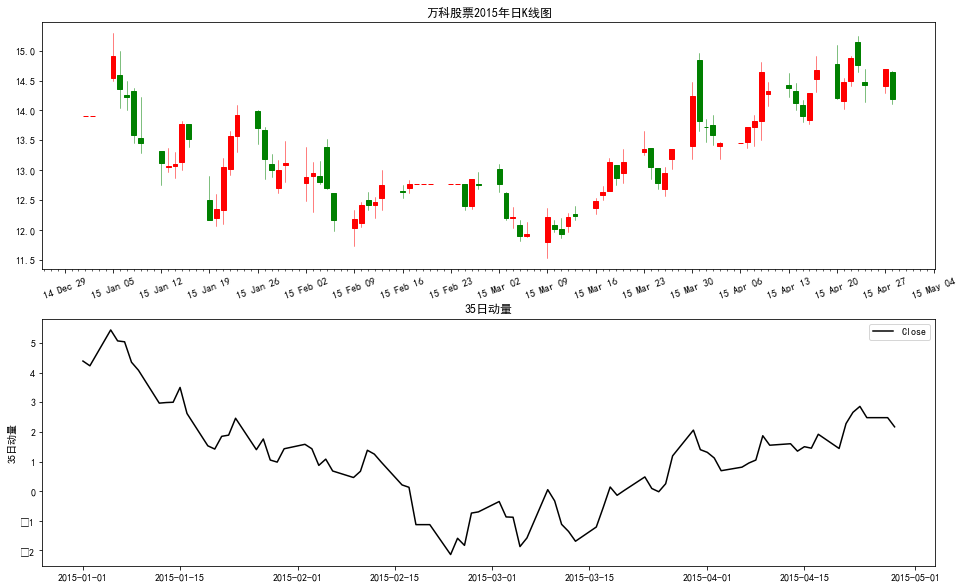

In [33]:
#Candle 模组是自己编的模组，里面有绘制K线函数Candleplot
plt.rcParams['figure.figsize'] = (16, 10)
import candle
Vanke15 = Vanke['2015']
candle.candleLinePlots(Vanke['2015'],\
               candleTitle='万科股票2015年日K线图',\
               splitFigures=True,Data=momen35['2015'],\
               title='35日动量',ylabel='35日动量')

In [35]:
Close = Vanke.Close
momen35 = momentum(Close, 35)
momen35.head()

Date
2014-02-20   -0.71
2014-02-21   -0.83
2014-02-24   -1.15
2014-02-25   -0.91
2014-02-26   -0.75
Name: Close, dtype: float64

In [36]:
signal = []  #用于存放买入卖出信号
# 当动能为负数 信号取 -1 表示卖出
# 当动能为正数 信号取  1 表示买入

In [37]:
for i in momen35:
    if i > 0:
        signal.append(1)
    else:
        signal.append(-1)

signal = pd.Series(signal, index=momen35.index)
signal.head()

Date
2014-02-20   -1
2014-02-21   -1
2014-02-24   -1
2014-02-25   -1
2014-02-26   -1
dtype: int64

In [46]:
signal.value_counts()

 1    233
-1     76
dtype: int64

根据买入卖出信号，制定买入卖出策略，并回测计算收益率

In [38]:
tradeSig = signal.shift(1)
ret = Close / Close.shift(1) - 1
# ret=ret['2014-02-20':]
# ret.head(n=3)
Mom35Ret = ret * (signal.shift(1))
Mom35Ret[0:20]

Date
2014-01-01   NaN
2014-01-02   NaN
2014-01-03   NaN
2014-01-06   NaN
2014-01-07   NaN
2014-01-08   NaN
2014-01-09   NaN
2014-01-10   NaN
2014-01-13   NaN
2014-01-14   NaN
2014-01-15   NaN
2014-01-16   NaN
2014-01-17   NaN
2014-01-20   NaN
2014-01-21   NaN
2014-01-22   NaN
2014-01-23   NaN
2014-01-24   NaN
2014-01-27   NaN
2014-01-28   NaN
dtype: float64

In [43]:
ret

Date
2014-01-01         NaN
2014-01-02   -0.004981
2014-01-03   -0.018773
2014-01-06   -0.045918
2014-01-07   -0.006684
                ...   
2015-04-22    0.027624
2015-04-23   -0.008065
2015-04-24   -0.023035
2015-04-27    0.019417
2015-04-28   -0.034694
Name: Close, Length: 344, dtype: float64

In [44]:
Mom35Ret

Date
2014-01-01         NaN
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
                ...   
2015-04-22    0.027624
2015-04-23   -0.008065
2015-04-24   -0.023035
2015-04-27    0.019417
2015-04-28   -0.034694
Length: 344, dtype: float64

In [39]:
# 计算获胜率
real_Mom35Ret = Mom35Ret[Mom35Ret != 0]
real_ret = ret[ret != 0]

win = Mom35Ret[Mom35Ret > 0]
winrate = len(win) / len(Mom35Ret)
winrate

0.43023255813953487

Text(0.5, 1.0, '万科动量交易收益率时序图')

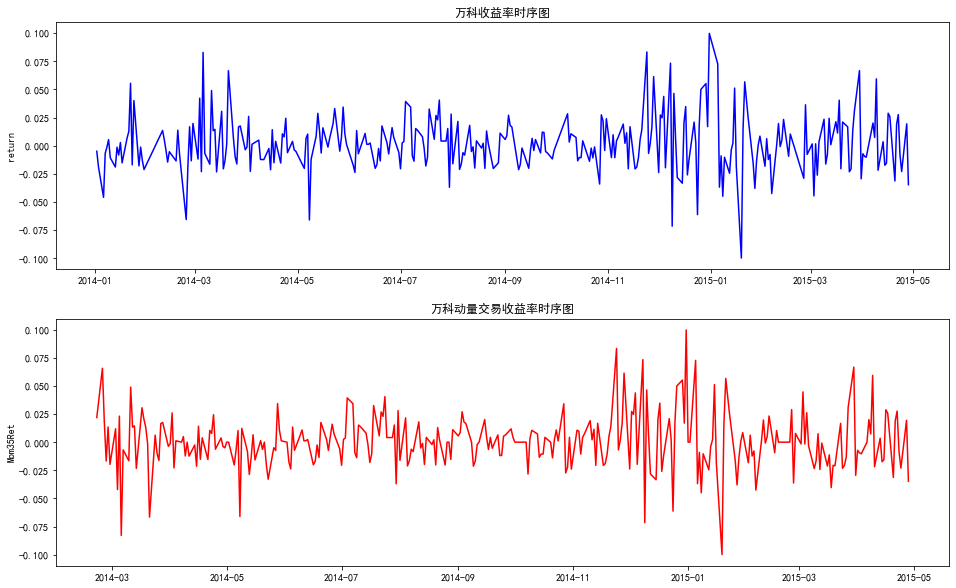

In [40]:
#绘制收益时序图
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(2, 1, 1)
plt.plot(real_ret, 'b')
plt.ylabel('return')
plt.title('万科收益率时序图')

plt.subplot(2, 1, 2)
plt.plot(Mom35Ret, 'r')
plt.ylabel('Mom35Ret')
plt.title('万科动量交易收益率时序图')

Text(0.5, 1.0, '损失直方图')

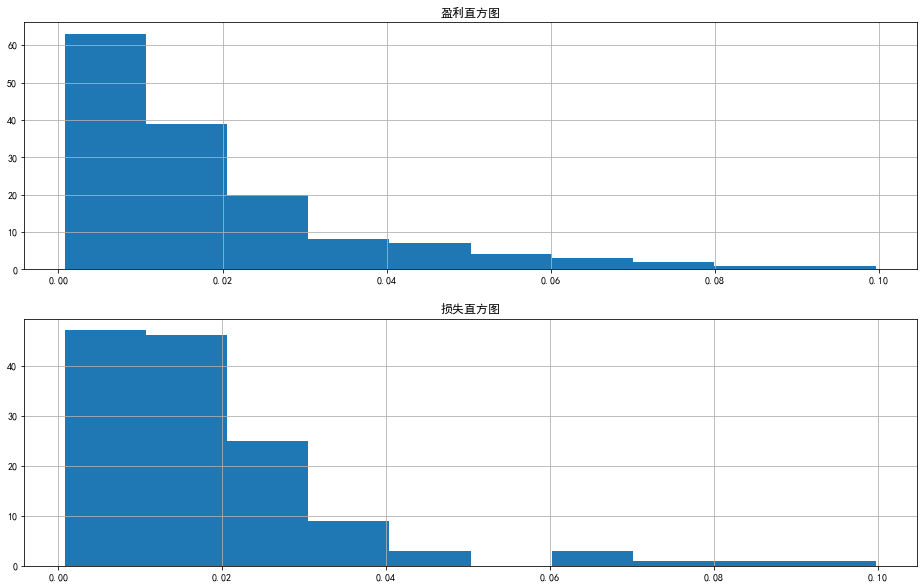

In [47]:
# 对比收益率
plt.rcParams['figure.figsize'] = (16, 10)
loss = -Mom35Ret[Mom35Ret < 0]
plt.subplot(2, 1, 1)
win.hist()
plt.title("盈利直方图")

plt.subplot(2, 1, 2)
loss.hist()
plt.title("损失直方图")

In [48]:
performance=pd.DataFrame({"win": win.describe(),\
"loss": loss.describe()})
performance

,win,loss
count,148.000000,136.000000
mean,0.018646,0.018514
std,0.018261,0.015860
min,0.000769,0.000805
25%,0.005472,0.008214
50%,0.013444,0.015996
75%,0.024786,0.022360
max,0.099684,0.099852
